<a href="https://colab.research.google.com/github/jananisathyamoorthy/student-performance-predictor/blob/main/predict_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [2]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# STEP 3: Add average score and pass/fail label
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Define pass/fail: pass if average >= 50
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)

# Preview updated data
df[['math score', 'reading score', 'writing score', 'average_score', 'pass']].head()


,math score,reading score,writing score,average_score,pass
0,72,72,74,72.666667,1
1,69,90,88,82.333333,1
2,90,95,93,92.666667,1
3,47,57,44,49.333333,0
4,76,78,75,76.333333,1


In [4]:
# STEP 4: One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=[
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
], drop_first=True)

# Show the shape and first few rows of the encoded DataFrame
print("Encoded shape:", df_encoded.shape)
df_encoded.head()


Encoded shape: (1000, 17)


,math score,reading score,writing score,average_score,pass,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,72.666667,1,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,82.333333,1,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,92.666667,1,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,49.333333,0,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,76.333333,1,True,False,True,False,False,False,False,False,True,False,True,True


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# STEP 5: Split data
X = df_encoded.drop(['pass', 'average_score'], axis=1)
y = df_encoded['pass']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       173

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [6]:
import pandas as pd

# New student data as a dictionary
new_student = {
    'math score': 45,
    'reading score': 50,
    'writing score': 48,
    'gender_male': 0,
    'race/ethnicity_group B': 0,
    'race/ethnicity_group C': 1,
    'race/ethnicity_group D': 0,
    'race/ethnicity_group E': 0,
    "parental level of education_bachelor's degree": 0,
    "parental level of education_high school": 1,
    "parental level of education_master's degree": 0,
    "parental level of education_some college": 0,
    "parental level of education_some high school": 0,
    'lunch_standard': 0,
    'test preparation course_none': 1
}

# Convert to DataFrame
new_student_df = pd.DataFrame([new_student])

# Predict
prediction = model.predict(new_student_df)[0]

# Show result
result = "Pass ✅" if prediction == 1 else "Fail ❌"
print("Prediction for the new student:", result)


Prediction for the new student: Fail ❌


In [8]:
# Top 10 most important features (by absolute coefficient value)
top10_df = importance_df.copy()
top10_df['abs_importance'] = top10_df['Importance'].abs()
top10_df = top10_df.sort_values('abs_importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top10_df['Feature'], top10_df['Importance'], color='orange')
plt.xlabel("Coefficient Value (Impact)")
plt.title("🔥 Top 10 Most Influential Features")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'importance_df' is not defined

In [9]:
# Generate feature importance from logistic regression
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names and coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Create a DataFrame of feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
}).sort_values(by='Importance', key=abs, ascending=False)

# Preview
importance_df.head()


,Feature,Importance
2,writing score,1.365504
0,math score,1.172175
1,reading score,1.116115
6,race/ethnicity_group D,0.424603
8,parental level of education_bachelor's degree,0.324133


/tmp/ipython-input-1219959925.py:13: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


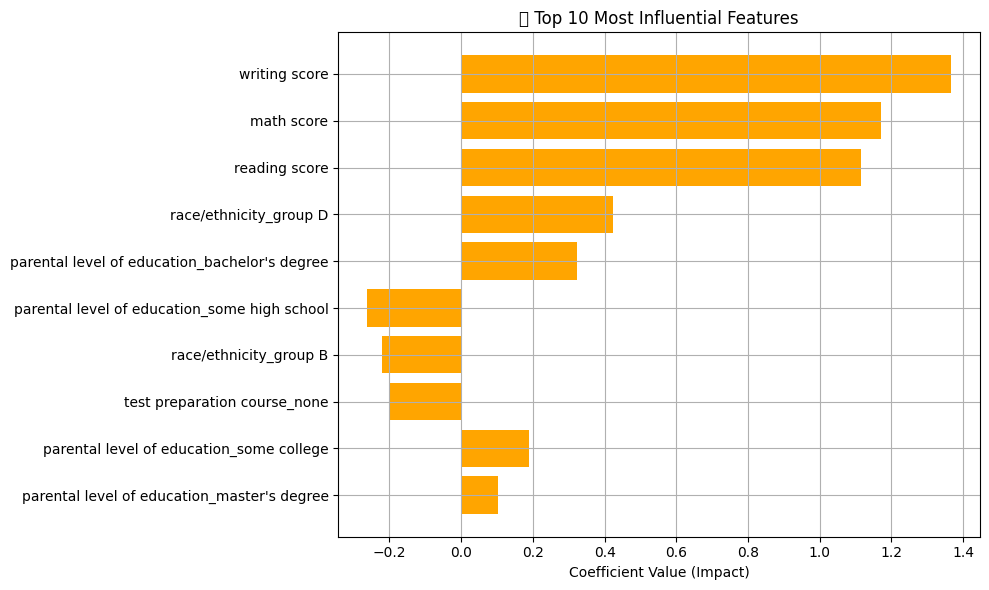

In [10]:
# Top 10 most important features (by absolute coefficient value)
top10_df = importance_df.copy()
top10_df['abs_importance'] = top10_df['Importance'].abs()
top10_df = top10_df.sort_values('abs_importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top10_df['Feature'], top10_df['Importance'], color='orange')
plt.xlabel("Coefficient Value (Impact)")
plt.title("🔥 Top 10 Most Influential Features")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()
